## TITLE: CORONARY HEART DISEASE PREDICTION USING MACHINE LEARNNG.

<br>

### ABOUT CORONARY HEART DISEASE(CHD)

<br>
Heart disease is a general phrase for a variety of conditions that affect the  heart's structure and how it works. Coronary<br> heart disease is type of heart disease where the arteries of the heart cannot deliver enough oxygen-rich blood to the heart.<br>

Coronary heart disease affects the larger coronary arteries  on the surface of the heart. Another type of heart disease is <br>the coronary microvascular disease, this affects the tiny arteries in the heart muscle. Coronary microvascular disease <br> is common in women.


#### CAUSES OF CORONARY HEART DISEASE

Coronary artery disease is often caused by cholesterol, a waxy substance that builds up inside the lining of the coronary<br> arteries forming a plaque. This build-up can partially or totally block the blood flow in the large arteries of the heart. 


#### RISK FACTORS

One's risk of having coronary heart disease increases based on some factors and how serious they are. some factors include<br>

1. Blood pressure.
2. High blood cholesterol.
3. Age.
4. Sex.
5. Family history and genetics.
6. Race and ethnicity.
7. Environment and occupation.
8. Lifestyle habits.
9. Medical conditions. for example, Diabetes, mental health conditions etc.


#### THE NEED FOR MACHNE LEARNING AIDED PREDICTION OF CHD:

Heart disease can be a silent condition, meaning you may not have any symptoms unitl have a serious health problem, such as<br> a heart attack. As a result scientists have turned towards modern approaches such as data mining and machine learning for<br> predicting the disease.


Machine Learning is very effective in detecting patterns and classification tasks. For these reasons we deem it effecient <br> in the decision making for such kind of health disease prediction.

#### THE DATASET

In this project, we will be exploring different machine learning techniques to predict whether a patient stands a <br> ten-year risk of developing coronary heart disease. The dataset we will be using in this piece of work is the Framingham dataset which can be found on kaggle <br> <a> href = "https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset/code?select=framingham.csv" </a>


The dataset has 4240 rows and 16 columns, we refer the these 16 columns as attributes, they are regarded as the risk factors.


### Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from operator import add
%matplotlib inline
import math
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
fram = pd.read_csv('Framingham.csv')
fram

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0



#### Define the attributes
<br>

 - Male: This was used to represent the sex of patients(1 = male, 0 = female). We have corrected this to sex instead.
 - Age: age of patient.
 - Education.
 - CurrentSmoker: If the patient is an active smoker or not(Nominal)
 - CigsPerDay= Number of cigarettes a patient smokes per day.
 - BPMeds: If the patient takes blood pressure medications.
 - PrevalentStroke: If or not the patient has had stroke.
 - PrevalentHyp: If or not the patient is hypertensive.
 - Diabetes: If or not the patient is diabetic.
 - TotChol: Total level of Cholesterol in a patient.
 - SysBP: Patient's systolic blood pressure.
 - DiaBP: patient's Diastolic blood pressure.
 - BMI: Body Mass Index.
 - HeartRate: Patient's Heart rate.
 - Glucose: Patient's glucose level

In [4]:
fram = fram.rename(columns={'male':'sex'})
fram

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [5]:
#Let us define a function called unique_number that returns the unique value count of each column

In [6]:
#we create an empty list

unique_number = []
for i in fram.columns:
    x = fram[i].value_counts().count()
    unique_number.append(x)

In [7]:
pd.DataFrame(unique_number, index=fram.columns, columns=['Unique values']) #Display the unique values in a data frame.

,Unique values
sex,2
age,39
education,4
currentSmoker,2
cigsPerDay,33
BPMeds,2
prevalentStroke,2
prevalentHyp,2
diabetes,2
totChol,248


In [8]:
fram.nunique()

sex                   2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1364
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

- So we see that the variables with few unique values are the categorical variables and the variables with high unique values<br> are the numeric variables.
<br><br>
<b> Categorical Variables:</b> [ <i>sex, currentSmoker, BPMeds, prevalentStroke, prevalentHyp, diabetes</i> ]
<br><br>
<b> Numerical Variables:</b> [<i> age, cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, glucose </i> ]

### Next we separate the numerical and categorical variables

In [9]:
categor_var = ['sex', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes' ]

numer_var = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'heartRate', 'glucose']

In [10]:
#Next we look at the statistics of these variables individually.

### Let us view the corelations between these variables

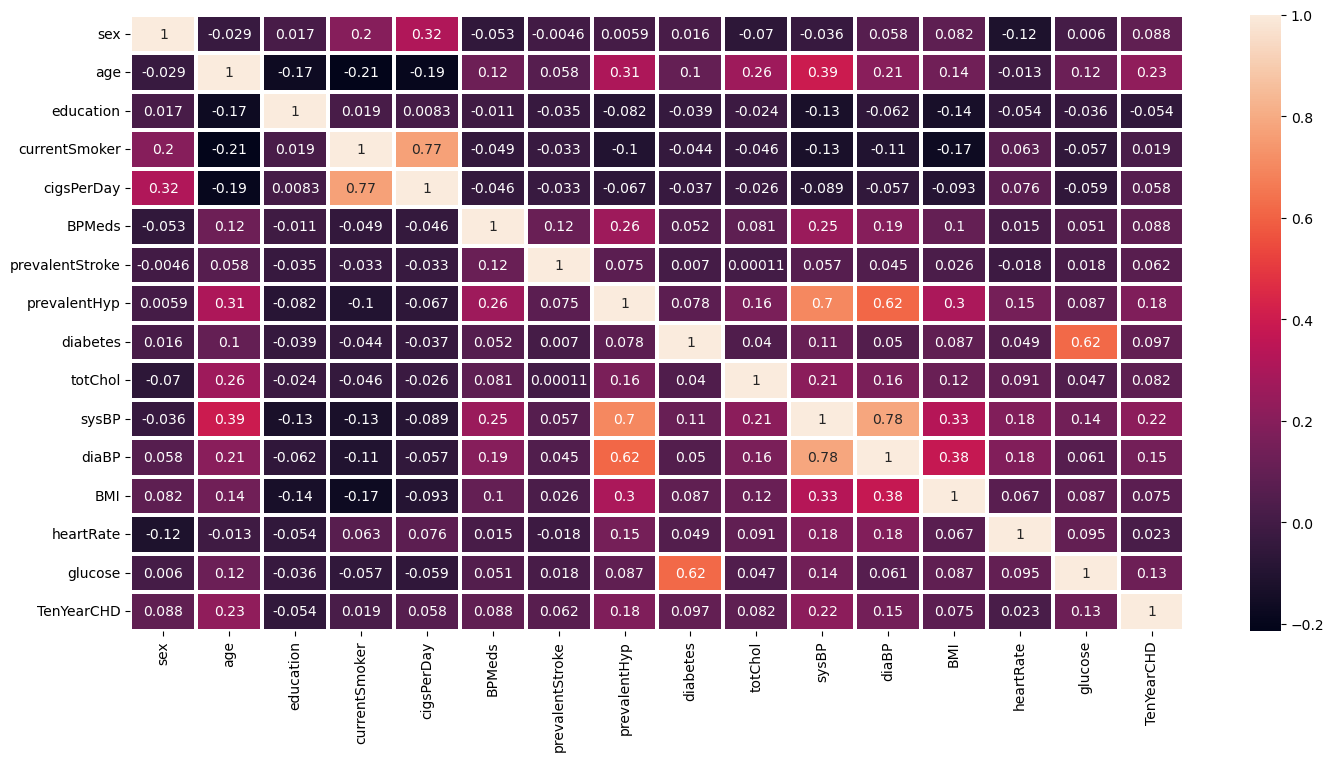

In [11]:
#We show the correlation using a heatmap.

fig, ax = plt.subplots(figsize=(17,8))
fram_corr = sns.heatmap(fram.corr(), ax=ax, annot=True, linewidth=1.5)
plt.show()

#### Observations:
<br>

- We notice that education has the least correlation value(negative correlation). Hence we can drop the eductaion column.
<br>

- Most feautures are not seen to have a good correlation with the TenYearCHD, although some features have a slighty fair <br> correlation for instance age and syBP. Hence we need to pick the features with the best correlation weight for our analysis.

In [12]:
#We drop the eductaion column

fram.drop('education', axis=1, inplace=True)
fram

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


### Dealing with missing data.

In [13]:
#Total percentage of missing data

missing_data = fram.isnull().sum()
total_percentage = (missing_data.sum()/fram.shape[0])*100
print(f'Total percentage of missing data is {round(total_percentage,2)}%')

Total percentage of missing data is 12.74%


In [14]:
missing_data

sex                  0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [15]:
#Percentage of missing data per variables.

total = fram.isnull().sum().sort_values(ascending=False)

percentage_total = (fram.isnull().sum()/fram.isnull().count()).sort_values(ascending=False)*100

missing = pd.concat([total, percentage_total], axis=1, keys=['Total_sum', 'Percentage'])

missing_data = missing[missing['Total_sum']>0]

missing_data

,Total_sum,Percentage
glucose,388,9.150943
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


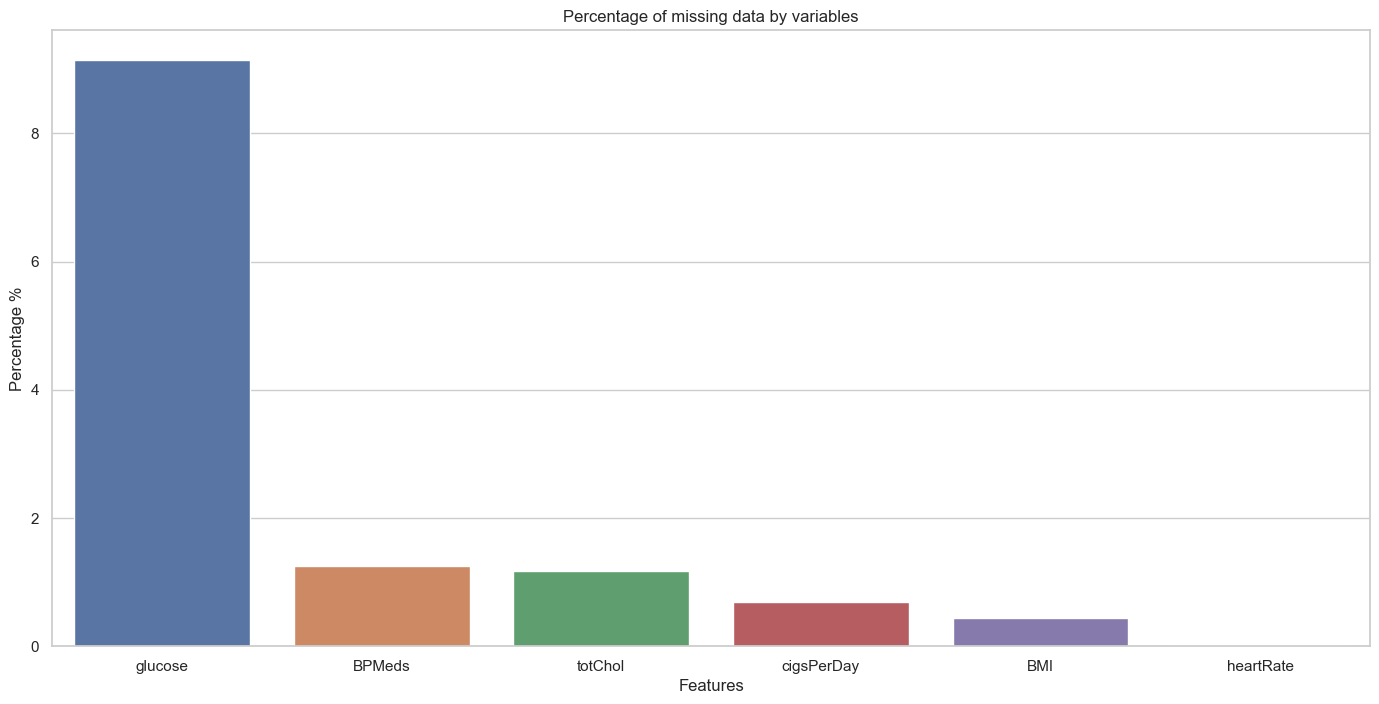

In [16]:
### Let's visualize this with a barchart

plt.figure(figsize=(17, 8))

sns.set(style='whitegrid')

sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data=missing_data)

plt.title('Percentage of missing data by variables')

plt.xlabel('Features')

plt.ylabel('Percentage %')

plt.show()

-  Blood glucose variable has the highest percentage of missing data (9.15%)  
- We can do our anaylysis without these missing data.

In [17]:
fram.dropna(axis=0, inplace=True)
fram

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


### Let us view the data distribution.

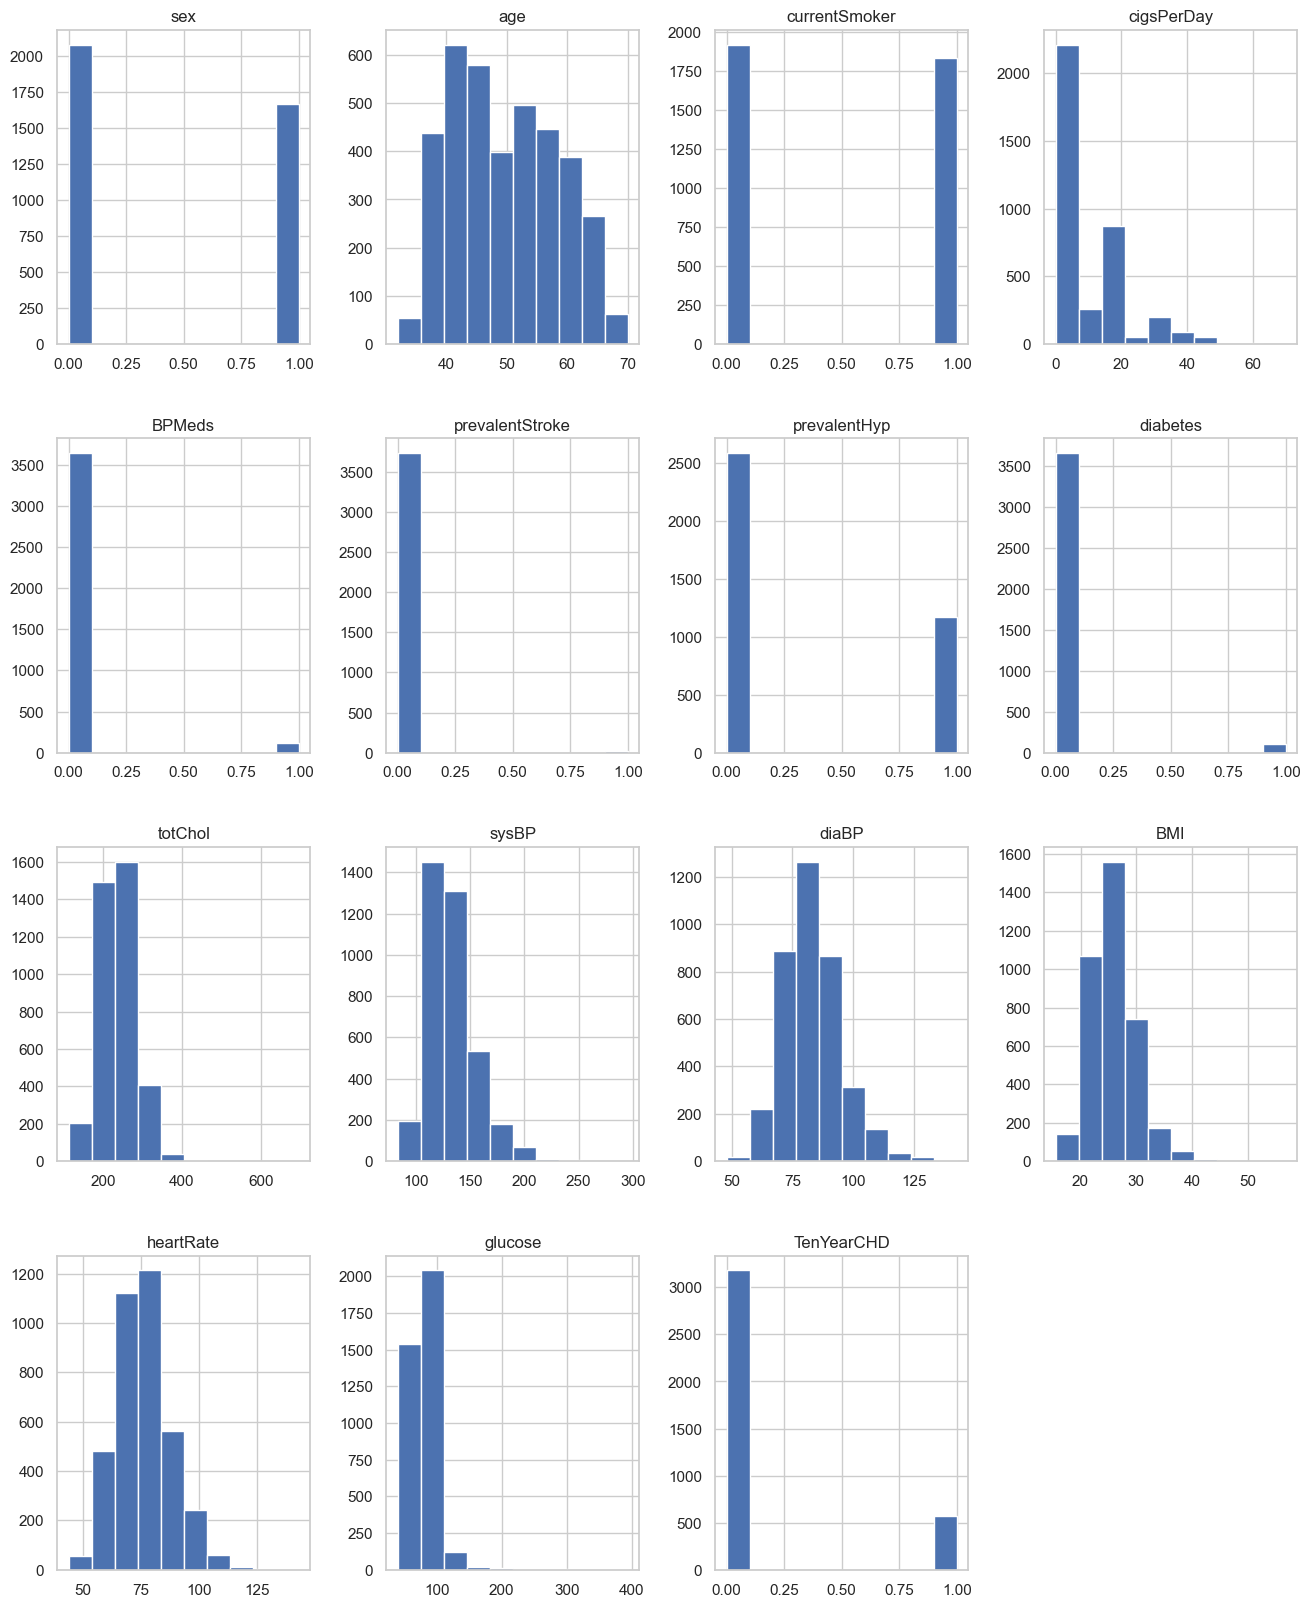

In [18]:
#We plot a histogram of the remainng features

fig = plt.figure(figsize=(16,20))

ax = fig.gca()

fram.hist(ax=ax)

plt.show()

- We notice that the BPMeds, diabetes, prevalentstroke and prevalentHyp are poorly balanced.

### Case count of our supposed target column.

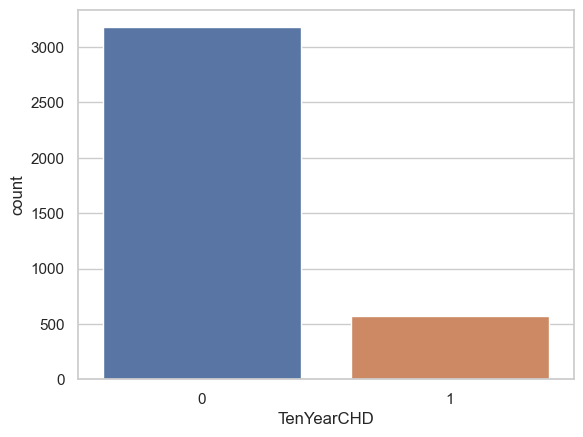

Number of patients with heart disease are 572 and those without heart disease are 3179


In [19]:
sns.countplot(x=fram['TenYearCHD'])

plt.show()

cases = fram.TenYearCHD.value_counts()

print(f'Number of patients with heart disease are {cases[1]} and those without heart disease are {cases[0]}')
      

### Visualizing TenYearCHD with respect to their age

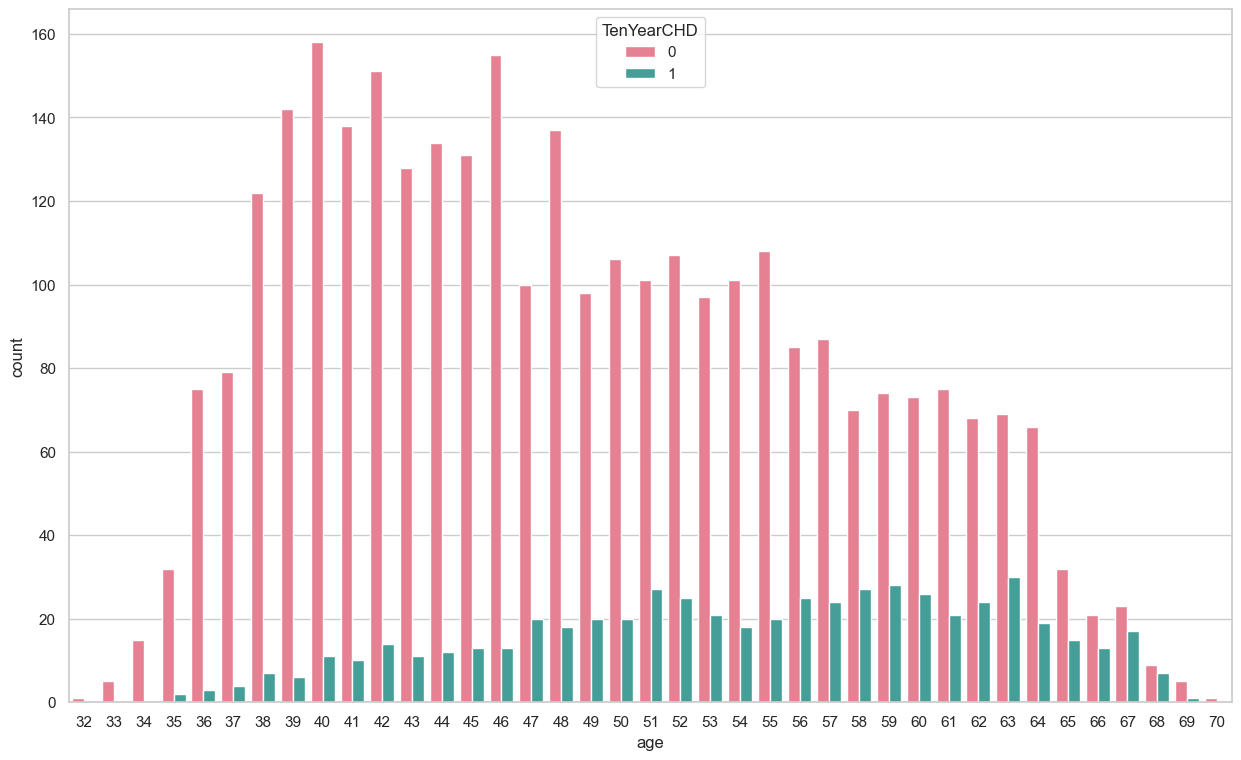

In [20]:
plt.figure(figsize=(15, 9))

sns.countplot(x=fram['age'], hue=fram['TenYearCHD'], palette='husl')

plt.show()

- We notice an increase in the number of patients having heart disease from age of 47 years to somewhere around the age of 64 years <br> as shown in the green bars.

#### Comparing some features with our target column(TenYearCHD).

In [21]:
def layered_barchart(data, title=None, ylabel=None, xlabel=None):
    default_colors = ['green', 'red']
    
    #convert to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals)*100).T
    r = list(range(data.index.size))
    
    #for the plots
    
    barWidth = 0.85
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]
    
    #Create bars
    
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1
        
    # Custom X axis
    
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.coloumns.name if ylabel is None else ylabel)
    ax = plt.gca()
    
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])
    
    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', 
               fontdict=dict(color='white', size=20))
        
    for item in ([ax.title]):
        item.set_fontsize(25)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(25)
        
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

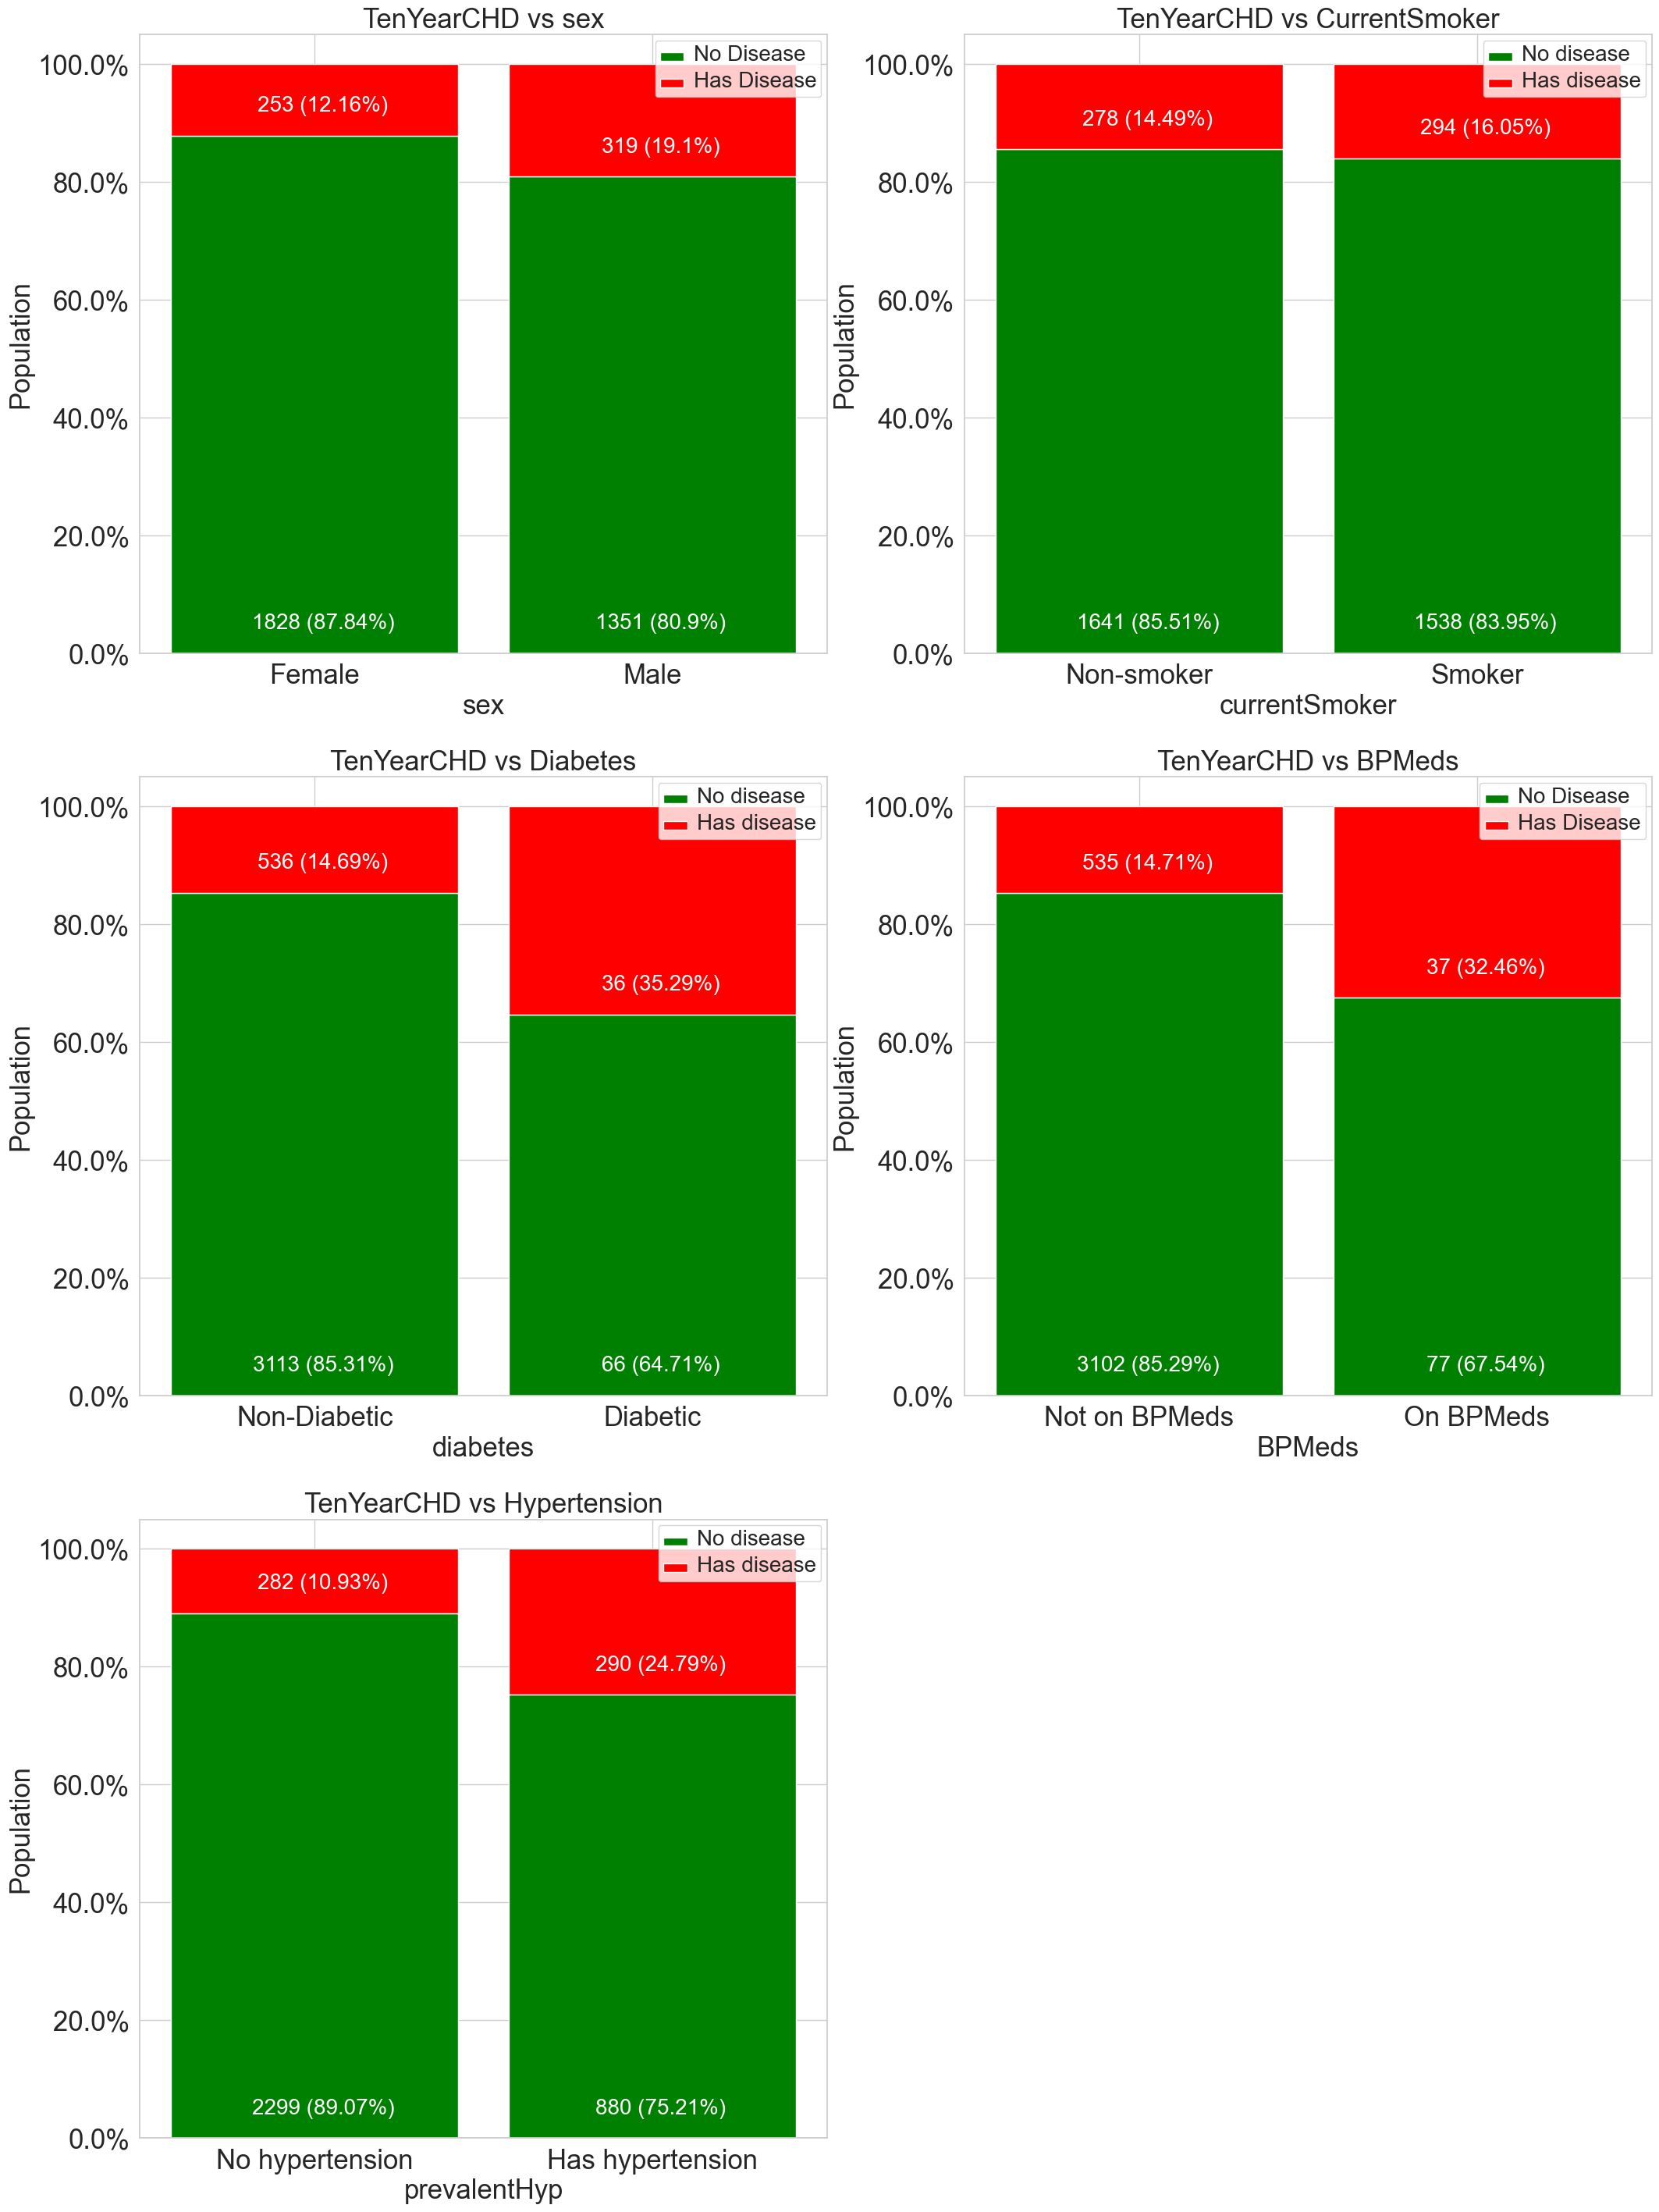

In [22]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

#draw sex vs disease outcome

plt.subplot(grid_rows, grid_cols, 1)
temp = fram[['sex', 'TenYearCHD']].groupby(['sex', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Female', 1: 'Male'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
layered_barchart(temp, title = 'TenYearCHD vs sex', ylabel='Population')

#Show the TenYearCHD vs Currensmoker bar ratio

plt.subplot(grid_rows, grid_cols, 2)
temp = fram[['currentSmoker', 'TenYearCHD']].groupby(['currentSmoker', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Non-smoker', 1: 'Smoker'}, columns={0: 'No disease', 1: 'Has disease'}, inplace=True)
layered_barchart(temp, title='TenYearCHD vs CurrentSmoker', ylabel='Population')

# We next show the percentage relation between Diabetes  and TenYearCHD

plt.subplot(grid_rows, grid_cols, 3)
temp = fram[['diabetes', 'TenYearCHD']].groupby(['diabetes', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Non-Diabetic', 1: 'Diabetic'}, columns={0: 'No disease', 1: 'Has disease'}, inplace=True)
layered_barchart(temp, title='TenYearCHD vs Diabetes', ylabel='Population')

# Percentage comparison between TenYearCHD and BPMeds

plt.subplot(grid_rows, grid_cols, 4)
temp = fram[['BPMeds', 'TenYearCHD']].groupby(['BPMeds', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not on BPMeds', 1: 'On BPMeds'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
layered_barchart(temp, title='TenYearCHD vs BPMeds', ylabel='Population')

#Hypertension vs TenYearCHD

plt.subplot(grid_rows, grid_cols, 5)
temp = fram[['prevalentHyp', 'TenYearCHD']].groupby(['prevalentHyp', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'No hypertension', 1: 'Has hypertension'}, columns={0: 'No disease', 1: 'Has disease'}, inplace=True)
layered_barchart(temp, title='TenYearCHD vs Hypertension', ylabel='Population')

#### Observations:

- We observe a higher percentage of men with CHD than women although there are more women than men in comparison.
<br>
- smoking does not seem to have much link with CHD as we can see that a high percentage of smokers have no CHD.
<br>
- Diabetes, prevalentHyp and those taking BPMeds are seen to have a higher percentage of having CHD.

In [23]:
fram[categor_var].describe()

,sex,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,0.488403,0.030392,0.005599,0.311917,0.027193
std,0.497056,0.499932,0.171686,0.074623,0.463338,0.162666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
fram[numer_var].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,heartRate,glucose
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,49.573447,9.008531,236.928019,132.368435,82.938550,75.704079,81.880032
std,8.570204,11.925097,44.611594,22.046522,11.932779,11.956382,23.882233
min,32.000000,0.000000,113.000000,83.500000,48.000000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,68.000000,71.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,75.000000,78.000000
75%,56.000000,20.000000,264.000000,144.000000,90.000000,82.000000,87.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,143.000000,394.000000


- The average age is between the 25% and the 75%  is 49 which means the age variable will likely be a normal distribution.<br>

- The min and max age is 32 and 70 respectively, the mean age is approx. 50 which is close the median age 49.

In [25]:
#Let's visualize the numerical variable using a distribution plot

In [26]:
numer_var

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'heartRate', 'glucose']

In [27]:
numeric_axis_name = ['Age of patients', 'Cigaretes Per Day', 'Total Cholesterol', 'System Blood Pressure', 'Blood pressure of Diabetic patients', 'Heart rate', 'Glucose']

In [28]:
list(zip(numer_var, numeric_axis_name))

[('age', 'Age of patients'),
 ('cigsPerDay', 'Cigaretes Per Day'),
 ('totChol', 'Total Cholesterol'),
 ('sysBP', 'System Blood Pressure'),
 ('diaBP', 'Blood pressure of Diabetic patients'),
 ('heartRate', 'Heart rate'),
 ('glucose', 'Glucose')]

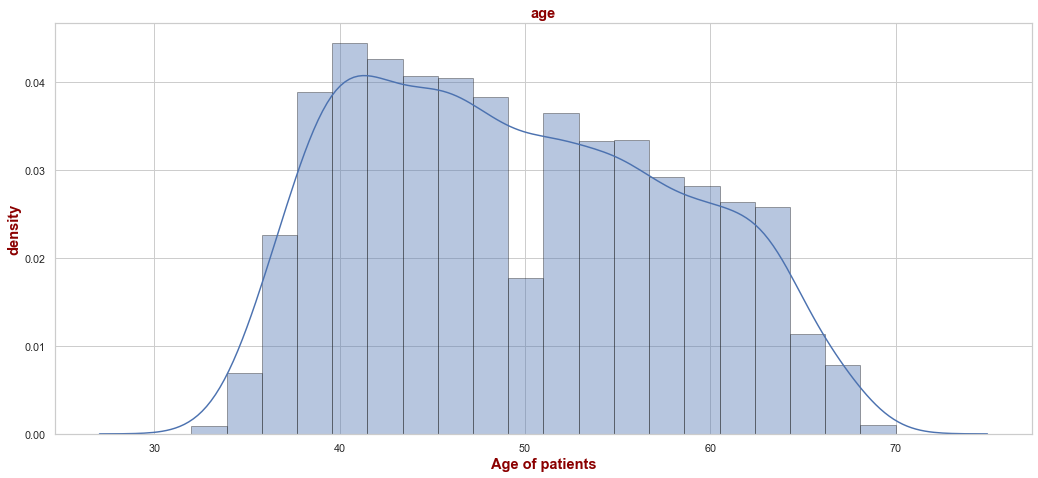

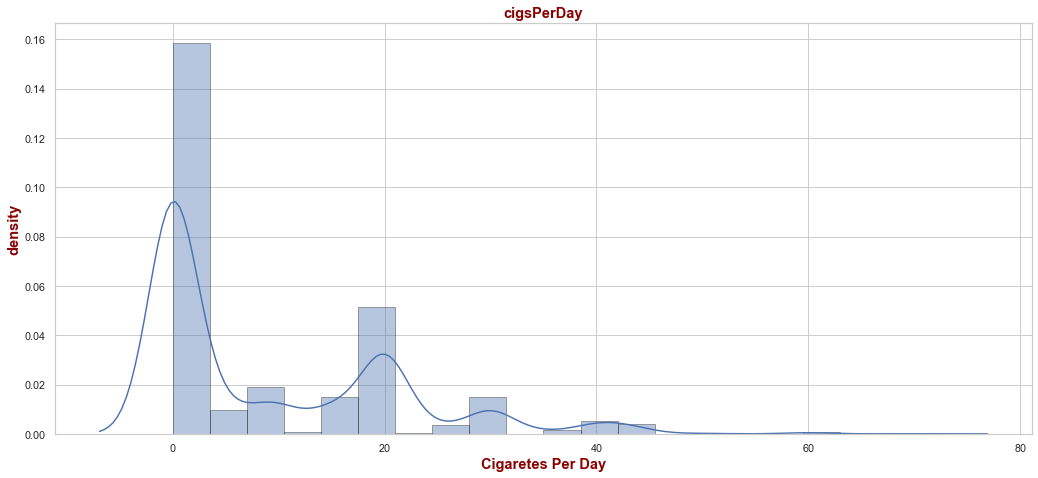

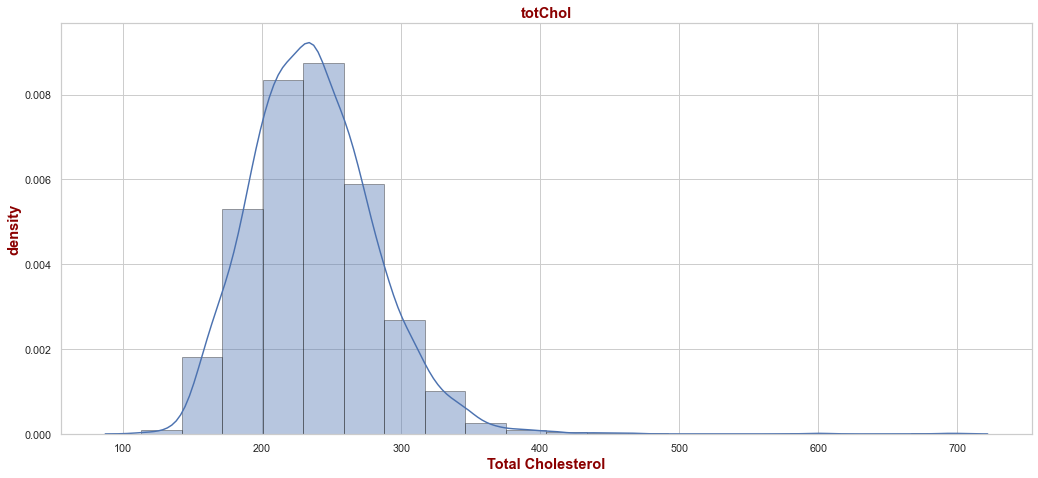

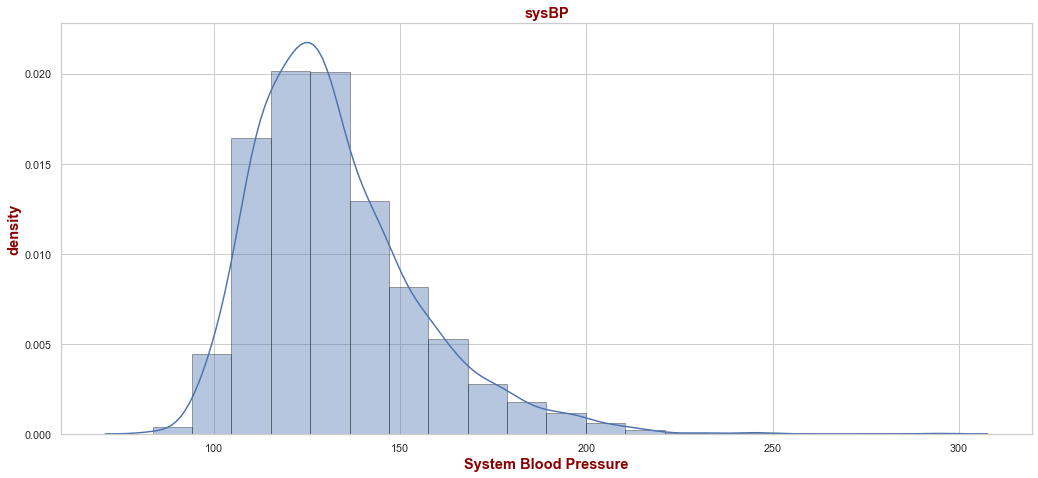

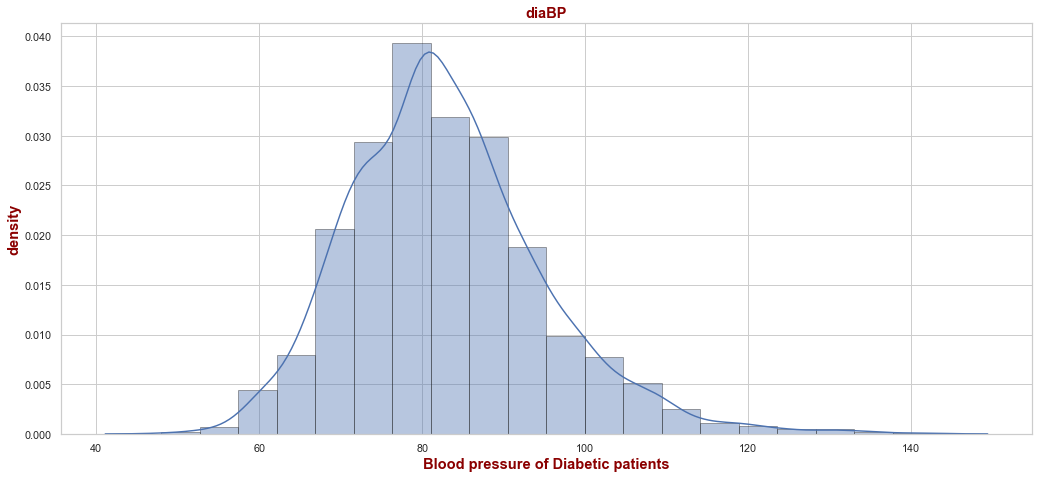

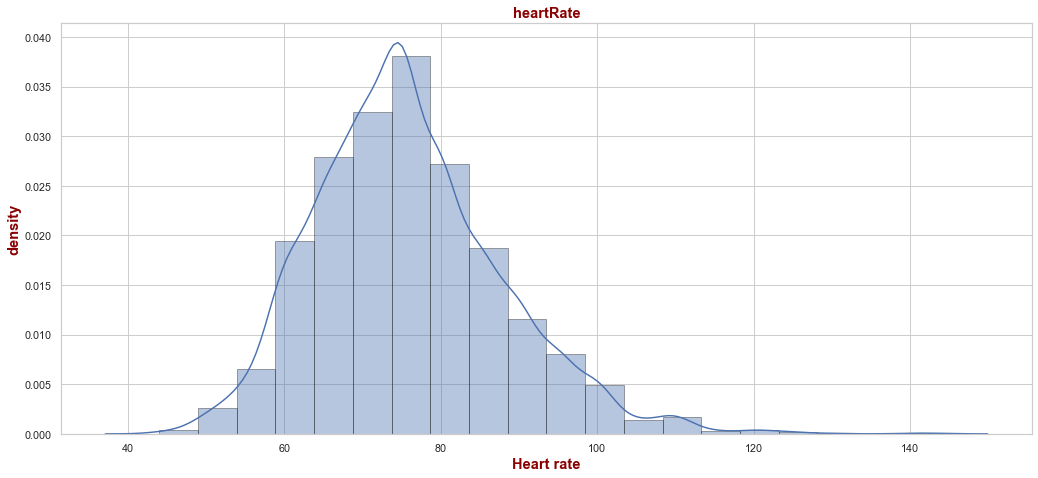

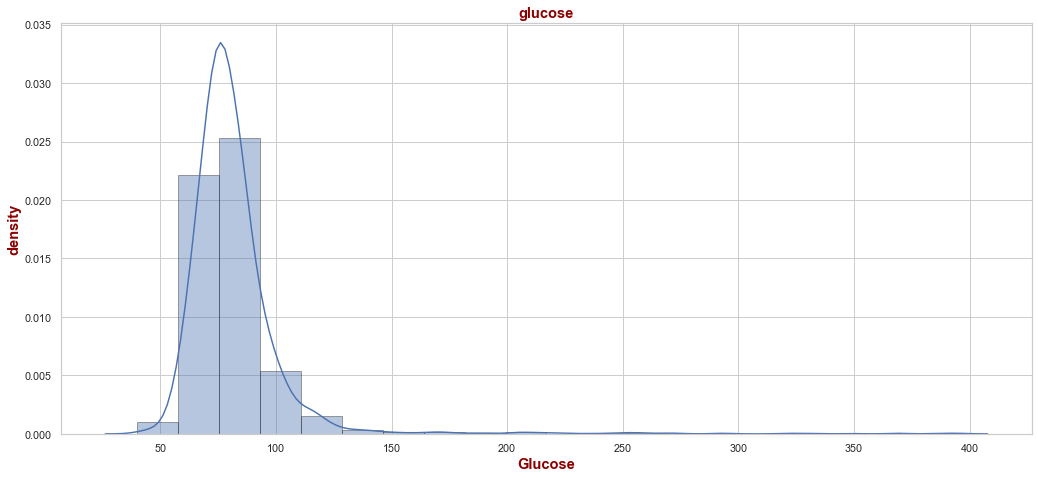

In [29]:
title_font = {'family':'arial', 'color':'darkred', 'weight':'bold', 'size':15}
axis_font = {'family':'arial', 'color':'darkred', 'weight':'bold', 'size':15}
for i, z in list(zip(numer_var, numeric_axis_name)):
    plt.figure(figsize=(15,7), dpi=70)
    sns.distplot(fram[i], hist_kws=dict(linewidth=1, edgecolor='k'), bins=20)
    
    plt.title(i, fontdict=title_font)
    plt.xlabel(z, fontdict=axis_font)
    plt.ylabel('density', fontdict=axis_font)
    plt.tight_layout()
    plt.show()
    
    import warnings
    warnings

In [30]:
fram[numer_var].corr()

,age,cigsPerDay,totChol,sysBP,diaBP,heartRate,glucose
age,1.000000,-0.188804,0.261443,0.388280,0.205191,-0.005893,0.118529
cigsPerDay,-0.188804,1.000000,-0.030600,-0.092310,-0.056202,0.067194,-0.055090
totChol,0.261443,-0.030600,1.000000,0.216375,0.169811,0.094795,0.046902
sysBP,0.388280,-0.092310,0.216375,1.000000,0.785853,0.181381,0.132878
diaBP,0.205191,-0.056202,0.169811,0.785853,1.000000,0.174918,0.061731
heartRate,-0.005893,0.067194,0.094795,0.181381,0.174918,1.000000,0.099575
glucose,0.118529,-0.055090,0.046902,0.132878,0.061731,0.099575,1.000000


### Viewing outliers: Box Plot

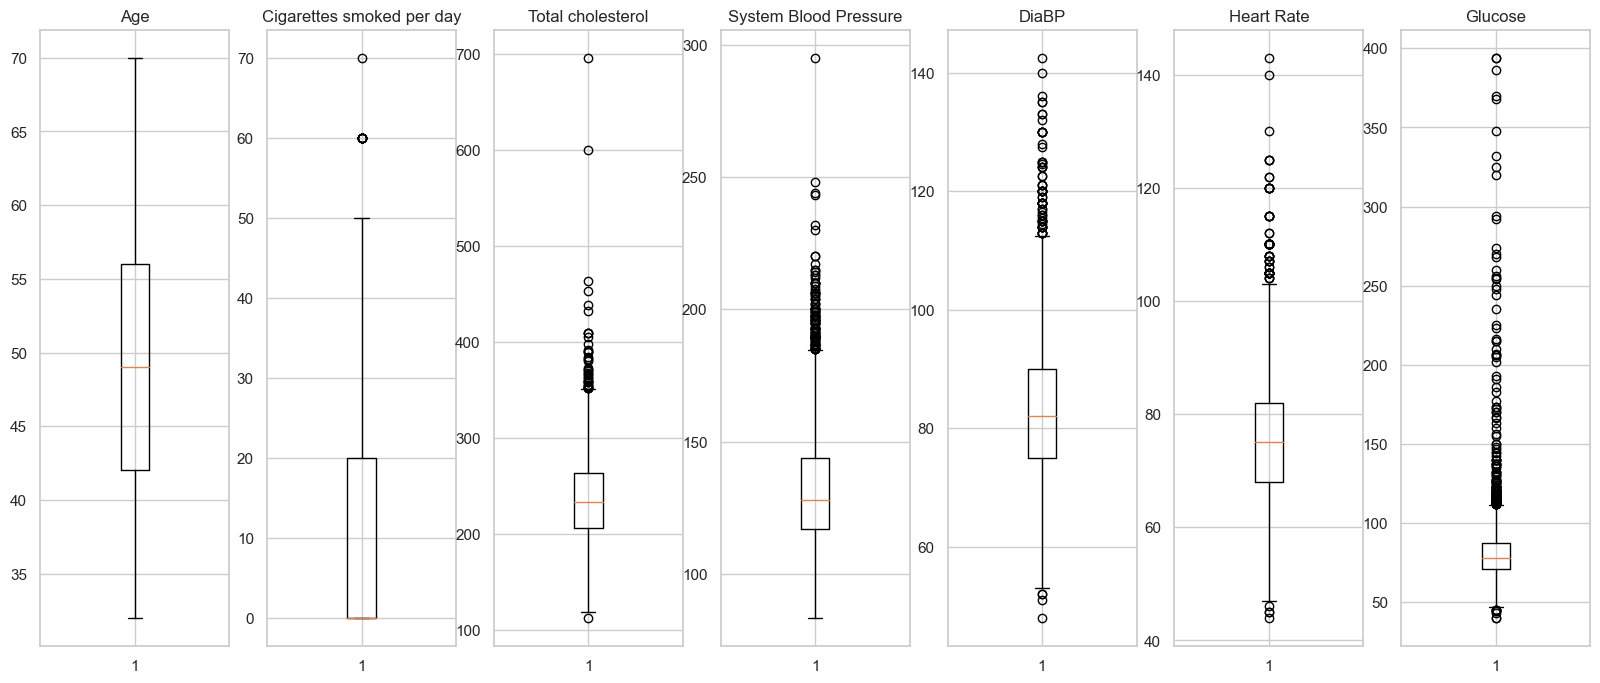

In [31]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, figsize=(20,8))
ax1.boxplot(fram['age'])
ax1.set_title('Age')

ax2.boxplot(fram['cigsPerDay'])
ax2.set_title('Cigarettes smoked per day')

ax3.boxplot(fram['totChol'])
ax3.set_title('Total cholesterol')

ax4.boxplot(fram['sysBP'])
ax4.set_title('System Blood Pressure')

ax5.boxplot(fram['diaBP'])
ax5.set_title('DiaBP')

ax6.boxplot(fram['heartRate'])
ax6.set_title('Heart Rate')

ax7.boxplot(fram['glucose'])
ax7.set_title('Glucose')

plt.show()

In [32]:
fram.isnull().any()

sex                False
age                False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

- Notice that we are unble to see view the boxplots for <i> cigsPerDay, totChol, heartrate, and glucose</i> because they contain null (NaN) values. We would look at other boxplots for the mean time.<br><br>

- We observe that sysBP and diaBP have a lot of outliers, The diaBP has upper and lower outliers.
- The box is a little shifted downwards in the sysBP which means most data are somewhat concentrated on the left.<br>
- The box for the diaBP is located close the middle which means the data is very like to be normally distributed.
- The age box is located in the midpoint of the whiskers and shows that there are no outliers.

In [33]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [34]:
# Now let us find the interquartile range:

def iqr(fram, var):
    q1 = np.quantile(fram[var], 0.25)
    q3= np.quantile(fram[var], 0.75)
    diff = q3 - q1
    lower_quantile = q1 - (1.5*diff)
    upper_quantile = q3 + (1.5*diff)
    return fram[(fram[var] < lower_quantile) | (fram[var] > upper_quantile)]

In [35]:
sysBP_outliers = iqr(fram, 'sysBP') #sysBP outliers

sysBP_outliers

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
44,0,53,0,0.0,1.0,0,1,1,311.0,206.0,92.0,21.51,76.0,215.0,1
66,0,62,0,0.0,0.0,0,1,1,212.0,190.0,99.0,29.64,100.0,202.0,0
87,0,61,1,1.0,0.0,0,1,0,326.0,200.0,104.0,38.46,57.0,78.0,0
108,0,66,0,0.0,0.0,0,1,0,278.0,187.0,88.0,40.52,90.0,84.0,1
153,0,66,0,0.0,0.0,0,1,0,214.0,212.0,104.0,25.32,57.0,84.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,1,51,0,0.0,0.0,0,1,0,268.0,206.0,116.0,26.35,98.0,70.0,1
4173,0,54,0,0.0,0.0,0,1,0,302.0,210.0,127.5,31.98,68.0,79.0,0
4193,0,63,0,0.0,0.0,0,1,0,306.0,195.0,105.0,27.96,75.0,87.0,1
4222,1,53,0,0.0,0.0,0,1,0,289.0,188.0,110.0,26.70,70.0,63.0,0
